# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [38]:
def one_sample_ttest(sample, popmean, alpha):
    """
    Performs a one-sample t-test.
    Parameters:
    sample(array-like): An array of observations (the sample data).
    popmean (float): The hypothesised population mean (under H0).
    alpha (float): The significance level.
    Returns:
       dict: A dictionary with the sample mean, t-statistics, critical t-value, and p-value.
    """
    import numpy as np
    import scipy.stats as stats
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Visualize sample distribution for normality 
    plt.figure(figsize=(8, 6))
    sns.histplot(sample, kde=True, color="skyblue", bins=5)
    plt.title("Sample Distribution with KDE")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
    n = len(sample)
    # Sample mean (x̄) using NumPy mean()
    x_bar = np.mean(sample)
    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample, ddof=1)
    # Degrees of freedom
    df = n-1
    # Calculate the critical t-value
    t_crit = stats.t.ppf(1 - alpha, df)
    # Calculate the t-value and p-value      
    t = (x_bar -  popmean)/(sigma/np.sqrt(n))
    results = stats.ttest_1samp(sample, popmean)
    p_value = (results.pvalue / 2)
    
    # Print results
    print("One Sample T-Test Results:")
    print("Sample Mean: {:.2f}".format(x_bar))
    print("T-Statistic: {:.4f}".format(t))
    print("Critical t-value (±): {:.4f}".format(t_crit))
    print("One-tailed p-value: {:.5f}".format(p_value))
    if p_value < alpha:
        print("Conclusion: Reject H0 (the sample mean is significantly different from 65).")
    else:
        print("Conclusion: Fail to reject H0 (the sample mean is not significantly different from 65).")
    
    return {
        "sample_mean": x_bar,
        "t_stat": t,
        "t_crit": t_crit,
        "p_value": p_value,
        "sample_stdev": sigma
    }
    

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

=== Original Sample Analysis ===


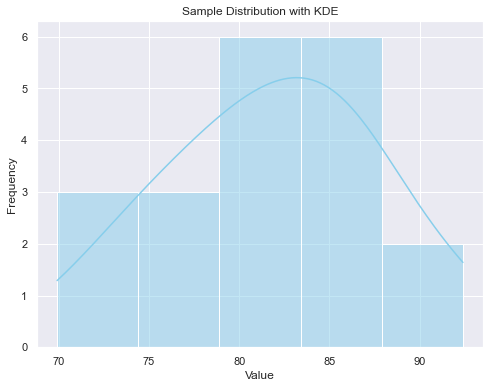

One Sample T-Test Results:
Sample Mean: 81.80
T-Statistic: 12.6876
Critical t-value (±): 1.7291
One-tailed p-value: 0.00000
Conclusion: Reject H0 (the sample mean is significantly different from 65).


In [39]:
# Given sample data for 20 students who took an online Python course:
sample = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
                   78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

popmean = 65.0      # Population (class) mean before the test
alpha = 0.05        # Significance level

print("=== Original Sample Analysis ===")
results_original = one_sample_ttest(sample, popmean, alpha)


=== Corrected Sample Analysis ===


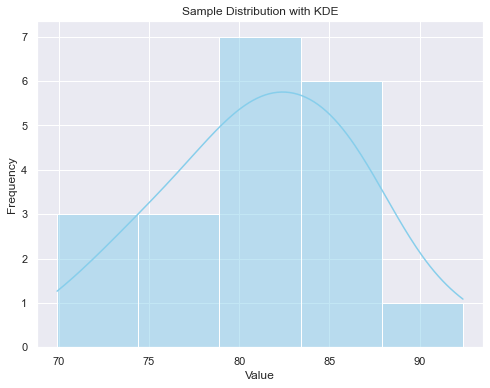

One Sample T-Test Results:
Sample Mean: 81.30
T-Statistic: 13.2021
Critical t-value (±): 1.7291
One-tailed p-value: 0.00000
Conclusion: Reject H0 (the sample mean is significantly different from 65).

Effect Size (Cohen's d) for the Original Sample: 2.8370


In [40]:
# Correct the error: replace the value 90.9 (at index 6) with 80.9.
sample_corrected = sample.copy()
sample_corrected[6] = 80.9

print("\n=== Corrected Sample Analysis ===")
results_corrected = one_sample_ttest(sample_corrected, popmean, alpha)

# Cohen's d = (sample_mean - popmean) / sample_stdev
effect_size = (results_original["sample_mean"] - popmean) / results_original["sample_stdev"]
print("\nEffect Size (Cohen's d) for the Original Sample: {:.4f}".format(effect_size))



In [41]:
print(
      "Magnitude of Effect:\n"
      "A Cohen’s d of 2.8370 is considered a very large effect size (generally, Cohen's guidelines classify 0.2 as small,\n"
      "0.5 as medium, and 0.8 or above as large).This indicates that the sample mean is\n" 
      "substantially higher than the population mean (65), relative to the variability within the sample.\n"
      )
print(
    "Relation to the Significance Test:\n"
    "Given the large effect size, the observed difference between the sample mean and 65 is not only statistically\n"
    "significant (i.e., p-value < 0.05) but also practically meaningful. A very large effect size like this suggests\n"
    "that the online training had a strong and substantial impact on improving Python test scores.\n"
    "Even if the sample size were smaller, the magnitude of this effect would still indicate a meaningful difference."
)


Magnitude of Effect:
A Cohen’s d of 2.8370 is considered a very large effect size (generally, Cohen's guidelines classify 0.2 as small,
0.5 as medium, and 0.8 or above as large).This indicates that the sample mean is
substantially higher than the population mean (65), relative to the variability within the sample.

Relation to the Significance Test:
Given the large effect size, the observed difference between the sample mean and 65 is not only statistically
significant (i.e., p-value < 0.05) but also practically meaningful. A very large effect size like this suggests
that the online training had a strong and substantial impact on improving Python test scores.
Even if the sample size were smaller, the magnitude of this effect would still indicate a meaningful difference.


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 